In [149]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import calendar
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime 
from dateutil.parser import parse 
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from explainerdashboard import ClassifierExplainer, RegressionExplainer
from explainerdashboard import ExplainerDashboard
from explainerdashboard import InlineExplainer


ModuleNotFoundError: No module named 'explainerdashboard'

In [39]:
bikes_day = pd.read_csv('/Users/CW/Desktop/0_CAB/Bike_Project/day.csv', sep =',')

display(bikes_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
display(bikes_day.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [41]:
print(bikes_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [42]:
print("Number of duplicate rows: ", bikes_day.duplicated().sum())

Number of duplicate rows:  0


In [43]:
print(bikes_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [44]:
data = bikes_day
print('Original dataset shape:', bikes_day.shape)

Original dataset shape: (731, 16)


In [45]:
bikes_day = bikes_day.drop_duplicates()


In [46]:
data = bikes_day
print('Original dataset shape:', bikes_day.shape)

# remove duplicates from the dataset
bikes_cleaned = bikes_day.drop_duplicates()

# print the number of rows in the cleaned dataset

print('Cleaned dataset shape:', bikes_cleaned.shape)

Original dataset shape: (731, 16)
Cleaned dataset shape: (731, 16)


In [47]:
print(bikes_day.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [48]:
bikes_day['dteday'] = pd.to_datetime(bikes_day['dteday'])
bikes_day['weekday_01'] = bikes_day['dteday'].dt.day_name()

print(bikes_day.head(10))

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   
5        6 2011-01-06       1   0     1        0        4           1   
6        7 2011-01-07       1   0     1        0        5           1   
7        8 2011-01-08       1   0     1        0        6           0   
8        9 2011-01-09       1   0     1        0        0           0   
9       10 2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696

In [49]:
#Create a new column for Weekend 


# Convert the 'dteday' column to a pandas DateTimeIndex
bikes_day['dteday'] = pd.to_datetime(bikes_day['dteday'])

# Create a new column 'is_weekend' with True for weekend days and False otherwise
bikes_day['is_weekend'] = bikes_day['dteday'].dt.weekday.isin({5, 6})

# Show the first 10 rows of the modified DataFrame
print(bikes_day.head(10))


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   
5        6 2011-01-06       1   0     1        0        4           1   
6        7 2011-01-07       1   0     1        0        5           1   
7        8 2011-01-08       1   0     1        0        6           0   
8        9 2011-01-09       1   0     1        0        0           0   
9       10 2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696

In [50]:
bikes_day['weekday_01'] = bikes_day['dteday'].dt.day_name()

print(bikes_day.head(10))

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   
5        6 2011-01-06       1   0     1        0        4           1   
6        7 2011-01-07       1   0     1        0        5           1   
7        8 2011-01-08       1   0     1        0        6           0   
8        9 2011-01-09       1   0     1        0        0           0   
9       10 2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696

In [51]:

# replace 0 with 'No' and 1 with 'Yes' in the 'holiday' column
bikes_day['holiday'] = bikes_day['holiday'].replace({0: 'No', 1: 'Yes'})

# print the updated DataFrame
print(bikes_day)



     instant     dteday  season  yr  mnth holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1      No        6           0   
1          2 2011-01-02       1   0     1      No        0           0   
2          3 2011-01-03       1   0     1      No        1           1   
3          4 2011-01-04       1   0     1      No        2           1   
4          5 2011-01-05       1   0     1      No        3           1   
..       ...        ...     ...  ..   ...     ...      ...         ...   
726      727 2012-12-27       1   1    12      No        4           1   
727      728 2012-12-28       1   1    12      No        5           1   
728      729 2012-12-29       1   1    12      No        6           0   
729      730 2012-12-30       1   1    12      No        0           0   
730      731 2012-12-31       1   1    12      No        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.36

In [52]:


# replace the values in the 'season' column
bikes_day['season'] = bikes_day['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# print the updated DataFrame
print(bikes_day)


     instant     dteday  season  yr  mnth holiday  weekday  workingday  \
0          1 2011-01-01  Winter   0     1      No        6           0   
1          2 2011-01-02  Winter   0     1      No        0           0   
2          3 2011-01-03  Winter   0     1      No        1           1   
3          4 2011-01-04  Winter   0     1      No        2           1   
4          5 2011-01-05  Winter   0     1      No        3           1   
..       ...        ...     ...  ..   ...     ...      ...         ...   
726      727 2012-12-27  Winter   1    12      No        4           1   
727      728 2012-12-28  Winter   1    12      No        5           1   
728      729 2012-12-29  Winter   1    12      No        6           0   
729      730 2012-12-30  Winter   1    12      No        0           0   
730      731 2012-12-31  Winter   1    12      No        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.36

#######ML testing Simple Linear Regression and Multiple Linear Regression

In [ ]:
## Month and Count

# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['mnth']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 12.246342168729898
Mean absolute error: 2.9075821254829015
R-squared: 0.01901969912706636


In [ ]:
## Weekday and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['weekday']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 3.686214153924181
Mean absolute error: 1.6516930747616694
R-squared: -0.00427910701683909


In [ ]:
## Weekend and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['is_weekend']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.17786839570064544
Mean absolute error: 0.39043883006896246
R-squared: -0.04444515290631745


In [ ]:
## Workingday and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['workingday']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.19674388054476066
Mean absolute error: 0.4184868174559952
R-squared: -0.02642165975174615


In [ ]:
## Holiday and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['holiday']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.03934495928585733
Mean absolute error: 0.06593606664776405
R-squared: -0.004970715375994361


In [ ]:
## Temp and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['temp']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.02090126978608265
Mean absolute error: 0.12050070288512923
R-squared: 0.406578313919852


In [ ]:
## average temper and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['atemp']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.016306452266221367
Mean absolute error: 0.10639085839897858
R-squared: 0.41499663024659217


In [ ]:
## Humidity and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['hum']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.020465966839964975
Mean absolute error: 0.11478013753868775
R-squared: -0.004831776479443439


In [ ]:
## Windspeed and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['windspeed']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.005520641054153867
Mean absolute error: 0.05735289671155082
R-squared: 0.08890208843131664


In [ ]:
## Weather Condition and Count
# select the variables for the linear regression model
X = bikes_day[['cnt']]
y = bikes_day['weathersit']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.2477474262313162
Mean absolute error: 0.4522269479874272
R-squared: 0.09322931344300267


In [ ]:

##Anova Test for all the variables (part of the interential statistics)
bikes_day

response = 'cnt'

# Define the list of predictor variables
predictors = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'casual', 'registered', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
for predictor in predictors:
    group1 = bikes_day.loc[bikes_day[predictor] <= bikes_day[predictor].median()][response]
    group2 = bikes_day.loc[bikes_day[predictor] > bikes_day[predictor].median()][response]
    f_stat, p_val = stats.f_oneway(group1, group2)
    print('ANOVA for {}:'.format(predictor))
    print('F-statistic:', f_stat)
    print('p-value:', p_val)

ANOVA for dteday:
F-statistic: 350.53670390234714
p-value: 3.652578135263947e-64
ANOVA for season:
F-statistic: 3.1499975958968114
p-value: 0.07634430419836115
ANOVA for yr:
F-statistic: nan
p-value: nan
ANOVA for mnth:
F-statistic: 17.56133865872688
p-value: 3.1232838381956024e-05
ANOVA for holiday:
F-statistic: 3.4214410399722115
p-value: 0.064759357926115
ANOVA for weekday:
F-statistic: 2.523963135778699
p-value: 0.11256204261055647
ANOVA for workingday:
F-statistic: nan
p-value: nan
ANOVA for casual:
F-statistic: 585.8205669051074
p-value: 1.916862573517586e-95
ANOVA for registered:
F-statistic: 996.6572402059178
p-value: 1.5256441129263737e-138
ANOVA for weathersit:
F-statistic: 49.79873710985065
p-value: 3.971136385161712e-12
ANOVA for temp:
F-statistic: 352.33335894386596
p-value: 1.988927947739336e-64
ANOVA for atemp:
F-statistic: 361.52080347302785
p-value: 9.028078510354302e-66
ANOVA for hum:
F-statistic: 2.3296686896727454
p-value: 0.1273626100150409
ANOVA for windspeed:
F-s

/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
import statsmodels.api as sm #Multiple Linear Regression Model 

# Select the predictor variables and the response variable
predictors = ['holiday', 'weekday', 'workingday', 'casual', 'registered', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
response = 'cnt'

# Create the design matrix X and the response vector y
X = bikes_day[predictors]
X = sm.add_constant(X)  # Add a constant column for the intercept
y = bikes_day[response]

# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

###from here, delete the highly correlated variables to improve the results ####

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.615e+32
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        12:20:32   Log-Likelihood:                 18973.
No. Observations:                 731   AIC:                        -3.792e+04
Df Residuals:                     720   BIC:                        -3.787e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.672e-12   3.69e-13      7.241      0.0

Multiple Linear Regression, create a correlation heatmap to detect correlated variables 

/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_1994/2220470974.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap (bikes_day.corr (), cmap = "Blues", annot=True)


Text(0.5, 1.0, 'Correlation Bikes Day')

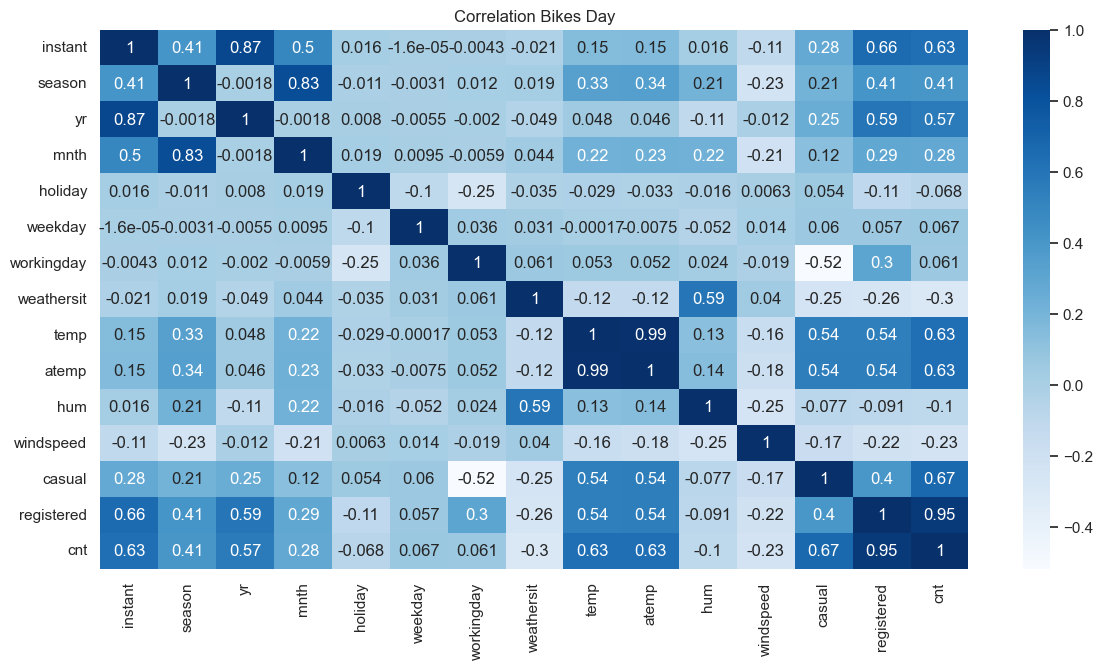

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bikes_day.corr
sns.heatmap (bikes_day.corr (), cmap = "Blues", annot=True)
sns.set(rc = {'figure.figsize':(16,8)}) #makes plot appear bigger (copied from LMS)
#using onlye one color fmt =.Of= only shows integers, if I don't want more decimal points
plt.title ('Correlation Bikes Day')

for the statistical analysis, create a frequency table or historgram for the variables in the dataset 

Frequency table for the descriptive statistics

In [ ]:
# Select the variables of interest
variables = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'casual', 'registered', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

# Create frequency tables for each variable
for variable in variables:
    freq_table = bikes_day[variable].value_counts().reset_index()
    freq_table.columns = [variable, 'Frequency']
    print('Frequency Table for', variable)
    print(freq_table)
    print('\n')


Frequency Table for dteday
        dteday  Frequency
0   2011-01-01          1
1   2012-04-25          1
2   2012-04-27          1
3   2012-04-28          1
4   2012-04-29          1
..         ...        ...
726 2011-09-03          1
727 2011-09-04          1
728 2011-09-05          1
729 2011-09-06          1
730 2012-12-31          1

[731 rows x 2 columns]


Frequency Table for season
   season  Frequency
0       3        188
1       2        184
2       1        181
3       4        178


Frequency Table for yr
   yr  Frequency
0   1        366
1   0        365


Frequency Table for mnth
    mnth  Frequency
0      1         62
1      3         62
2      5         62
3      7         62
4      8         62
5     10         62
6     12         62
7      4         60
8      6         60
9      9         60
10    11         60
11     2         57


Frequency Table for holiday
   holiday  Frequency
0        0        710
1        1         21


Frequency Table for weekday
   weekday  Fr

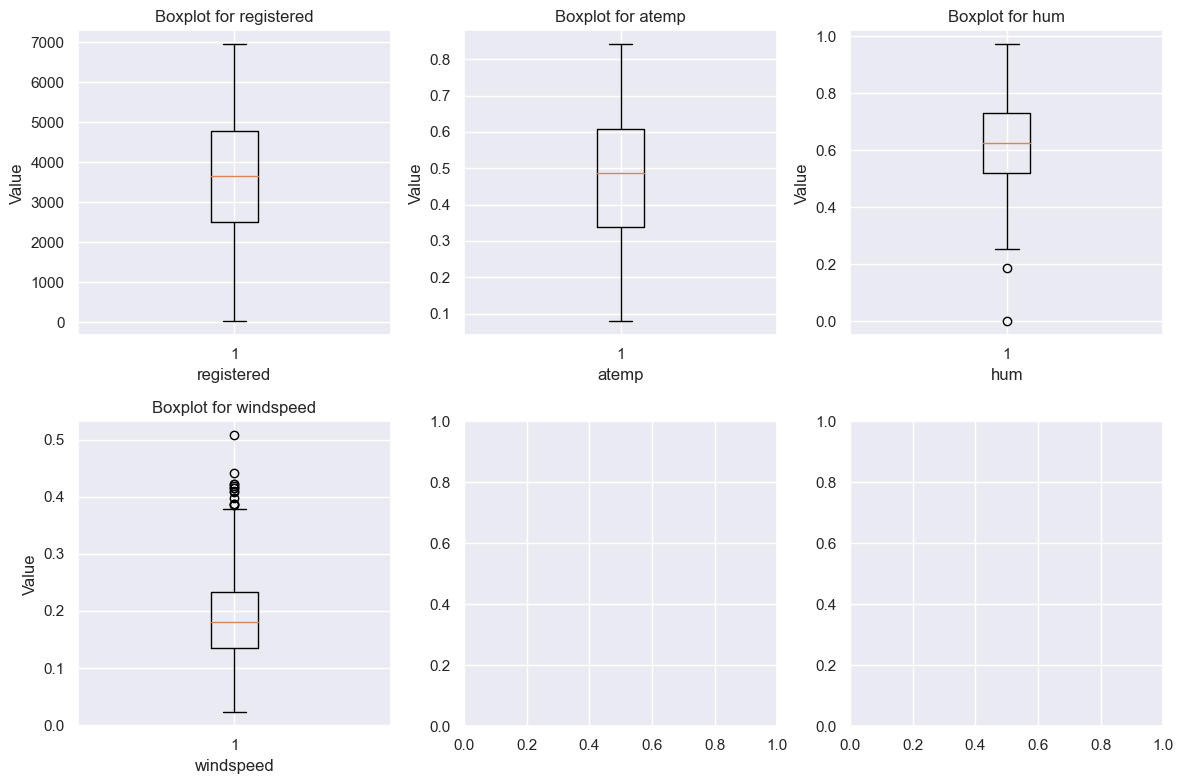

In [116]:


# Select the numerical variables of interest
numerical_variables = ['registered', 'atemp', 'hum', 'windspeed']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create boxplots for each variable
for i, variable in enumerate(numerical_variables):
    axes[i].boxplot(bikes_day[variable])
    axes[i].set_title('Boxplot for ' + variable)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Value')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


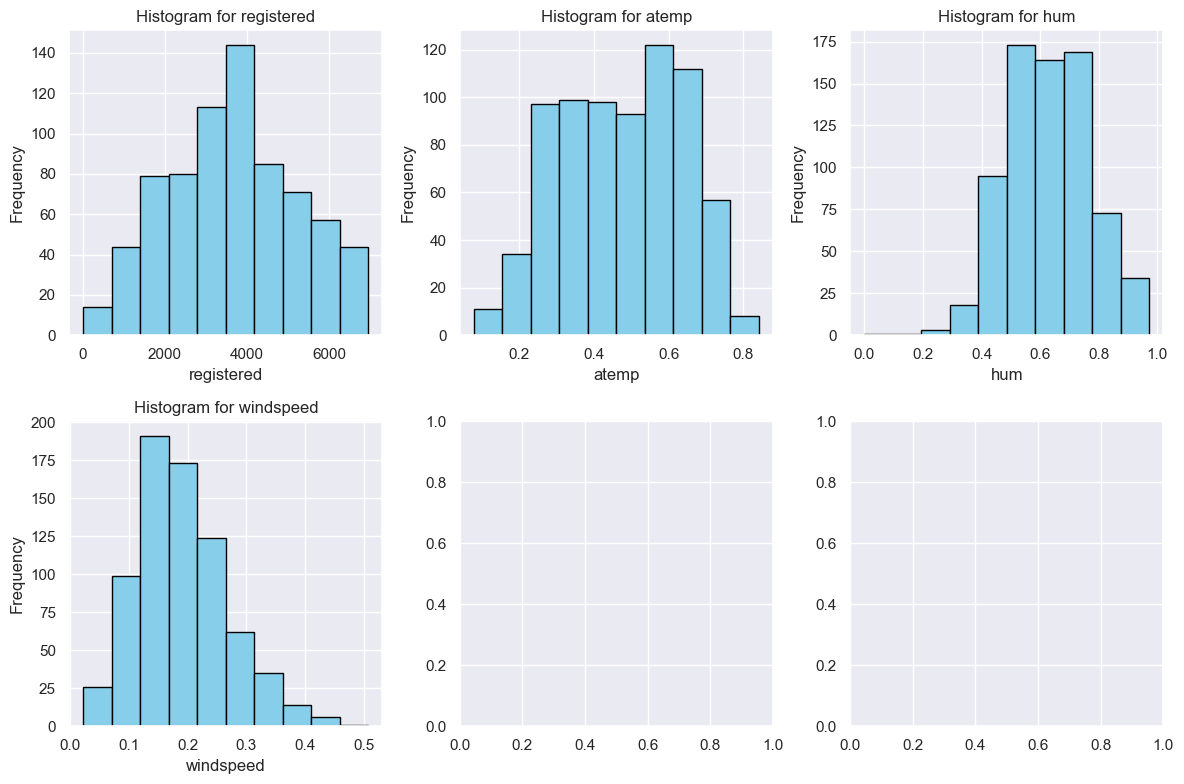

In [117]:


# Select the numerical variables of interest
numerical_variables = ['registered', 'atemp', 'hum', 'windspeed']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create histograms for each variable
for i, variable in enumerate(numerical_variables):
    axes[i].hist(bikes_day[variable], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title('Histogram for ' + variable)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


For Descriptive Statistics checking Percentiles

In [59]:

# Access the "cnt" column and convert it to a NumPy array
cnt_values = bikes_day["cnt"].values

# Calculate percentiles using numpy's percentile function
p25 = np.percentile(cnt_values, 25)
p50 = np.percentile(cnt_values, 50)  # Equivalent to the median
p75 = np.percentile(cnt_values, 75)

# Print the results
print("25th percentile:", p25)
print("50th percentile (median):", p50)
print("75th percentile:", p75)


25th percentile: 3152.0
50th percentile (median): 4548.0
75th percentile: 5956.0


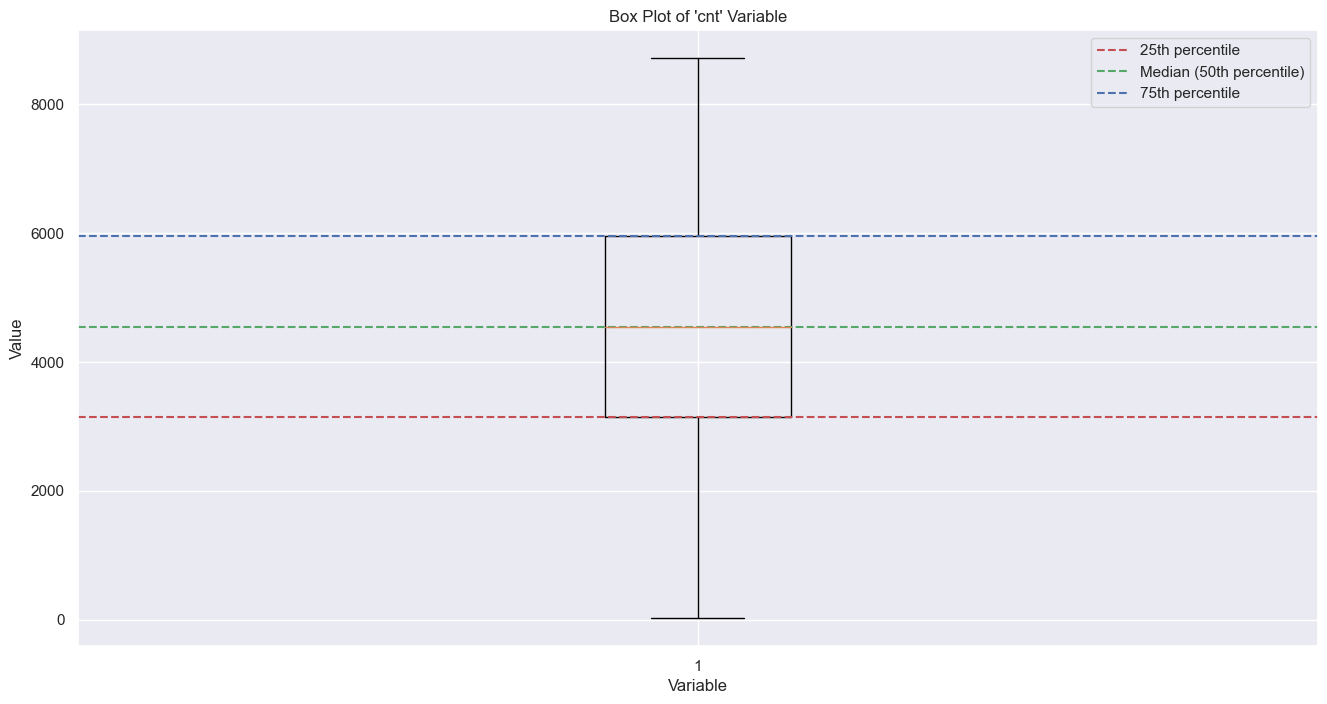

In [68]:

#visualizing the total number and percentiles 
# Access the "cnt" column and convert it to a NumPy array
cnt_values = bikes_day["cnt"].values

# Calculate percentiles using numpy's percentile function
p25 = np.percentile(cnt_values, 25)
p50 = np.percentile(cnt_values, 50)  # Equivalent to the median
p75 = np.percentile(cnt_values, 75)

# Create a box plot
plt.boxplot(cnt_values)
plt.title("Box Plot of 'cnt' Variable")
plt.xlabel("Variable")
plt.ylabel("Value")

# Add percentiles as horizontal lines
plt.axhline(p25, color='r', linestyle='--', label='25th percentile')
plt.axhline(p50, color='g', linestyle='--', label='Median (50th percentile)')
plt.axhline(p75, color='b', linestyle='--', label='75th percentile')

# Display legend
plt.legend()

# Show the plot
plt.show()


Measure of Disperson for descriptive Statistics 

In [57]:

dataset_variance = np.var(bikes_day)

/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [58]:
dataset_std_dev = np.std(bikes_day)

/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Use one Function to run all the Regression models (provided in the spike)

In [136]:
# Define the features and target variables
categorical_features = ['season', 'workingday'] 
numeric_features = ['atemp', 'hum', 'windspeed']
target = 'registered'

# Perform one-hot encoding using pd.get_dummies()
X_categorical = pd.get_dummies(bikes_day[categorical_features], drop_first=True)

# Combine the categorical and numerical features
X = pd.concat([X_categorical, bikes_day[numeric_features]], axis=1)
y = bikes_day[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression", make_pipeline(PolynomialFeatures(), LinearRegression())),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("K-Nearest Neighbors Regressor", KNeighborsRegressor()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("Ridge Regression", Ridge()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Ridge Regression CV", RidgeCV()),
]


In [137]:


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(X_test)

        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)

        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)

        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')

        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')

        # Provide prediction for a specific scenario
        scenario_data = [[0, 4, 1, 1, 25, 10, 70]]  # Example scenario data
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario: {scenario_prediction[0]}\n')

        # Add the model and its score to the top models list
        top_models.append((name, r2))

    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)

    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Linear Regression:
R2 Score: 0.49879835014646123
MSE: 1373880.46527306
MAE: 1003.778843217211

Predicted number of bikes for the scenario: -56494.32092767244

Polynomial Regression:
R2 Score: 0.5606727919895835
MSE: 1204271.9115646258
MAE: 944.9863945578231

Predicted number of bikes for the scenario: -3.0510649523795315e+17



/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Random Forest Regressor:
R2 Score: 0.5447609199495057
MSE: 1247889.1066959181
MAE: 940.3818367346939

Feature Importance:
atemp: 0.49028267247054974
hum: 0.20211768566710023
windspeed: 0.15309164186326207
workingday: 0.07409240526074475
season_Winter: 0.05135641597153541
season_Spring: 0.017934458047787868
season_Summer: 0.01112472071901992


Predicted number of bikes for the scenario: 1753.68

Decision Tree Regressor:
R2 Score: 0.1188043734167471
MSE: 2415509.7210884355
MAE: 1157.2312925170068

Feature Importance:
atemp: 0.5319640665793951
hum: 0.2194157067726663
windspeed: 0.14310529368173386
workingday: 0.056242250636871695
season_Winter: 0.021442634388433322
season_Summer: 0.014149743998996172
season_Spring: 0.0136803039419036


Predicted number of bikes for the scenario: 3195.0

K-Nearest Neighbors Regressor:
R2 Score: 0.5513660067326331
MSE: 1229783.420680272
MAE: 915.3074829931974

Predicted number of bikes for the scenario: 3652.4

Gaussian Process Regressor:
R2 Score: -8.41238

/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted w

Random Forest Classifier:
R2 Score: 0.33661479718664145
MSE: 1818453.6530612244
MAE: 999.9659863945578

Feature Importance:
atemp: 0.312763626706498
hum: 0.3100211376077092
windspeed: 0.30885526169220173
workingday: 0.024205553714110147
season_Spring: 0.017967327319951893
season_Summer: 0.013374210168883195
season_Winter: 0.012812882790645802


Predicted number of bikes for the scenario: 4896

Ridge Regression CV:
R2 Score: 0.4982636090249515
MSE: 1375346.2832348226
MAE: 1004.6414610386032

Predicted number of bikes for the scenario: -54379.76691972352

Polynomial Regression: 0.5606727919895835
K-Nearest Neighbors Regressor: 0.5513660067326331
Random Forest Regressor: 0.5447609199495057
Linear Regression: 0.49879835014646123
Ridge Regression CV: 0.4982636090249515
Ridge Regression: 0.49164364087020773
Random Forest Classifier: 0.33661479718664145
Decision Tree Regressor: 0.1188043734167471
Gaussian Process Regressor: -8.4123828302112


/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [138]:
from sklearn.preprocessing import StandardScaler ###added scaling to the model 

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    scaler = StandardScaler()
    
    # Fit the scaler on the training data
    scaler.fit(X_train)
    
    # Scale the training and testing data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for name, model in models:
        # Fit the model on the scaled training data
        model.fit(X_train_scaled, y_train)

        # Make predictions on the scaled testing data
        y_pred = model.predict(X_test_scaled)

        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)

        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)

        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')

        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')

        # Provide prediction for a specific scenario
        scenario_data = [[0, 4, 1, 1, 25, 10, 70]]  # Example scenario data
        scenario_data_scaled = scaler.transform(scenario_data)
        scenario_prediction = model.predict(scenario_data_scaled)
        print(f'Predicted number of bikes for the scenario: {scenario_prediction[0]}\n')

        # Add the model and its score to the top models list
        top_models.append((name, r2))

    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)

    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Linear Regression:
R2 Score: 0.49879835014646134
MSE: 1373880.4652730594
MAE: 1003.7788432172106

Predicted number of bikes for the scenario: -56494.320927672714

Polynomial Regression:
R2 Score: 0.6057244609685751
MSE: 1080777.4897959183
MAE: 913.204081632653

Predicted number of bikes for the scenario: -1.0391956011579156e+18



/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Random Forest Regressor:
R2 Score: 0.5366021548452575
MSE: 1270253.693885034
MAE: 937.3822448979593

Feature Importance:
atemp: 0.5030407077534279
hum: 0.19542399453287523
windspeed: 0.15075636365533673
workingday: 0.07093525482940063
season_Winter: 0.0485160948574887
season_Spring: 0.019920358580197323
season_Summer: 0.011407225791273309


Predicted number of bikes for the scenario: 1907.75

Decision Tree Regressor:
R2 Score: 0.04790432896635022
MSE: 2609859.0136054424
MAE: 1226.9727891156463

Feature Importance:
atemp: 0.5265558520915175
hum: 0.22101990845436753
windspeed: 0.14754275838979386
workingday: 0.056992252546908824
season_Winter: 0.020156042231426335
season_Spring: 0.013962751080585322
season_Summer: 0.013770435205400618


Predicted number of bikes for the scenario: 889.0

K-Nearest Neighbors Regressor:
R2 Score: 0.5353589250554683
MSE: 1273661.601904762
MAE: 933.0489795918368

Predicted number of bikes for the scenario: 3418.4



/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  

Gaussian Process Regressor:
R2 Score: -634.5804595680409
MSE: 1742236039.6558456
MAE: 17668.582648647814

Predicted number of bikes for the scenario: 0.0

Ridge Regression:
R2 Score: 0.49901881883716726
MSE: 1373276.1224352943
MAE: 1003.9079952204588

Predicted number of bikes for the scenario: -57326.22361654286

Random Forest Classifier:
R2 Score: 0.2829373236617494
MSE: 1965592.8979591837
MAE: 1091.7687074829932

Feature Importance:
atemp: 0.31439811593214934
hum: 0.31389760943095957
windspeed: 0.3083673033361503
workingday: 0.02352753905312854
season_Spring: 0.015031341349462619
season_Winter: 0.012724653594660301
season_Summer: 0.012053437303489291


Predicted number of bikes for the scenario: 4896

Ridge Regression CV:
R2 Score: 0.49901881883722377
MSE: 1373276.1224351393
MAE: 1003.9079952204195

Predicted number of bikes for the scenario: -57326.2236167333

Polynomial Regression: 0.6057244609685751
Random Forest Regressor: 0.5366021548452575
K-Nearest Neighbors Regressor: 0.5353

/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [132]:
# Define the features and target variables
categorical_features = ['workingday', 'season'] 
numeric_features = ['atemp', 'hum', 'windspeed'] ###removed holiday, weekday, weathersit
target = 'registered' #only checking for registered users

# Perform one-hot encoding using pd.get_dummies()
X_categorical = pd.get_dummies(bikes_day[categorical_features], drop_first=True)

# Combine the categorical and numerical features
X = pd.concat([X_categorical, bikes_day[numeric_features]], axis=1)
y = bikes_day[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression", make_pipeline(PolynomialFeatures(), LinearRegression())),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("K-Nearest Neighbors Regressor", KNeighborsRegressor()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("Ridge Regression", Ridge()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Ridge Regression CV", RidgeCV()),
]


In [135]:
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(X_test)

        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)

        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)

        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')

        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')

        # Provide prediction for a specific scenario
        scenario_data = [[ 1, 3, 25, 10, 70]]  # Example scenario data
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario: {scenario_prediction[0]}\n')

        # Add the model and its score to the top models list
        top_models.append((name, r2))

    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)

    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Linear Regression:
R2 Score: 0.49879835014646123
MSE: 1373880.46527306
MAE: 1003.778843217211



/Users/CW/anaconda3/envs/CodeAcademy/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but LinearRegression is expecting 7 features as input.

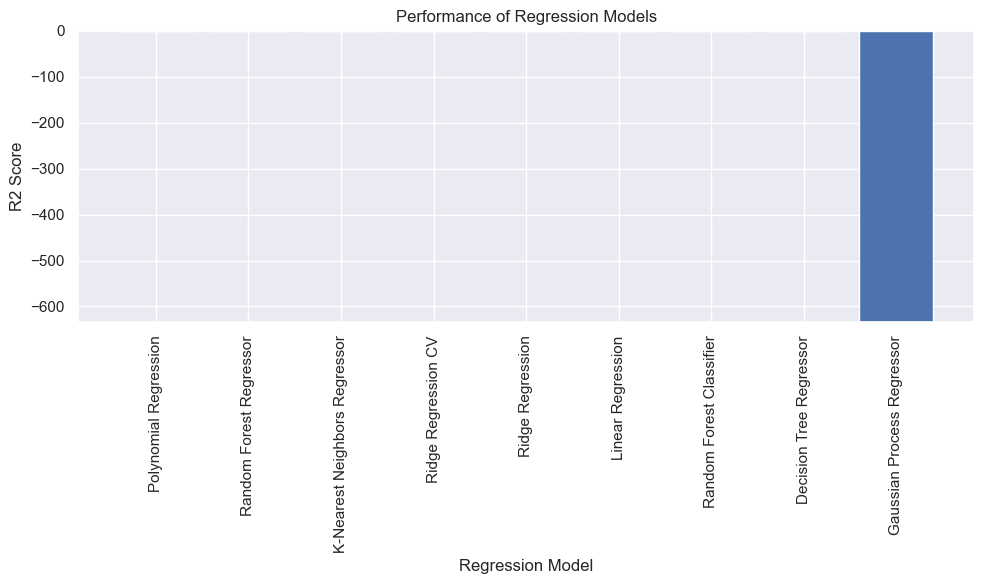

In [147]:


model_names = [
    "Polynomial Regression",
    "Random Forest Regressor",
    "K-Nearest Neighbors Regressor",
    "Ridge Regression CV",
    "Ridge Regression",
    "Linear Regression",
    "Random Forest Classifier",
    "Decision Tree Regressor",
    "Gaussian Process Regressor"
]

r2_scores = [
    0.6057244609685751,
    0.5366021548452575,
    0.5353589250554683,
    0.49901881883722377,
    0.49901881883716726,
    0.49879835014646134,
    0.2829373236617494,
    0.04790432896635022,
    -634.5804595680409
]

# Set a custom y-axis range based on the minimum and maximum R2 scores
y_min = min(r2_scores) - 0.1
y_max = max(r2_scores) + 0.5

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.xlabel("Regression Model")
plt.ylabel("R2 Score")
plt.title("Performance of Regression Models")
plt.xticks(rotation=90)
plt.ylim(y_min, y_max)  # Set the y-axis range
plt.tight_layout()


